# Problem Statement : Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

#### Data Description:
- Murder -- Muder rates in different places of United States
- Assualt- Assualt rate in different places of United States
- UrbanPop - urban population in different places of United States
- Rape - Rape rate in different places of United States

### Import Liabraies

In [141]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [121]:
#Import a Datadet
df=pd.read_csv(r'C:\Users\admin\Documents\Data Science\Assignment\Clustering\crime_data.csv')
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [122]:
#Check the size of data
df.shape

(50, 5)

In [123]:
#check the data type:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [124]:
#Desciptive Statestics
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


# Exploratory data analysis (EDA)
- Check for Duplicated
- check for missing values
- Rename the column if necessory
- Distribution of Numerical features.
- outlier detection

In [125]:
#check for duplicated
df.duplicated().sum()

0

In [126]:
#check for Missing value
df.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [127]:
#rename the Unnamed Column 
df.rename(columns={'Unnamed: 0':'States'}, inplace=True)

In [128]:
df.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [129]:
#Distribution of Numerical features.
num_features=[feature for feature in df.columns if df[feature].dtype!='O']
df[num_features].head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


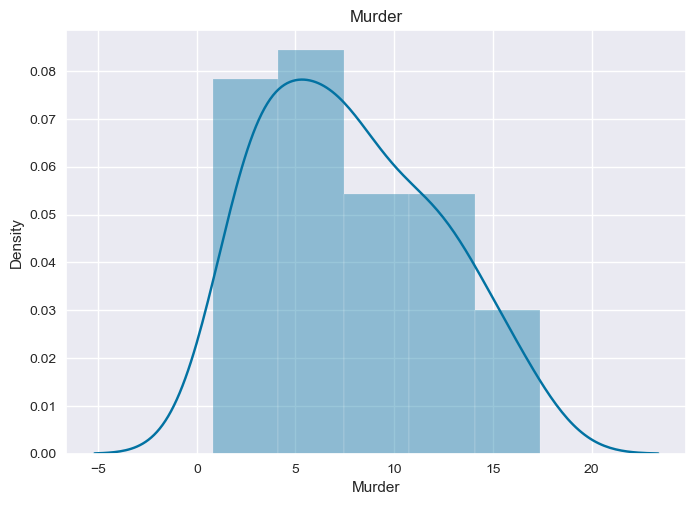

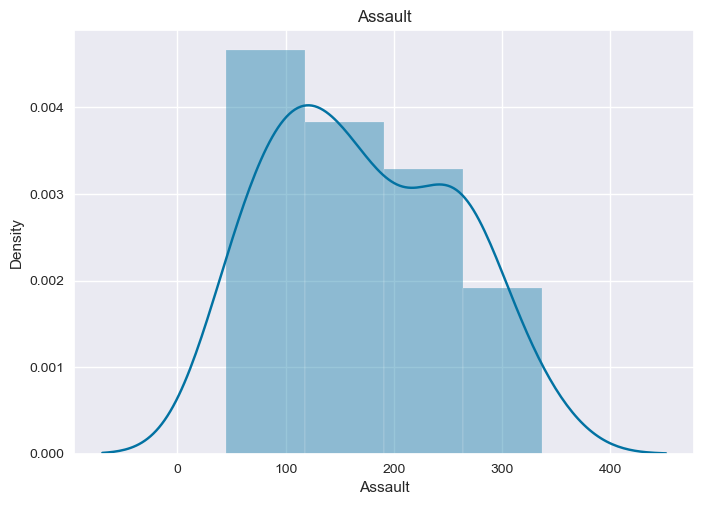

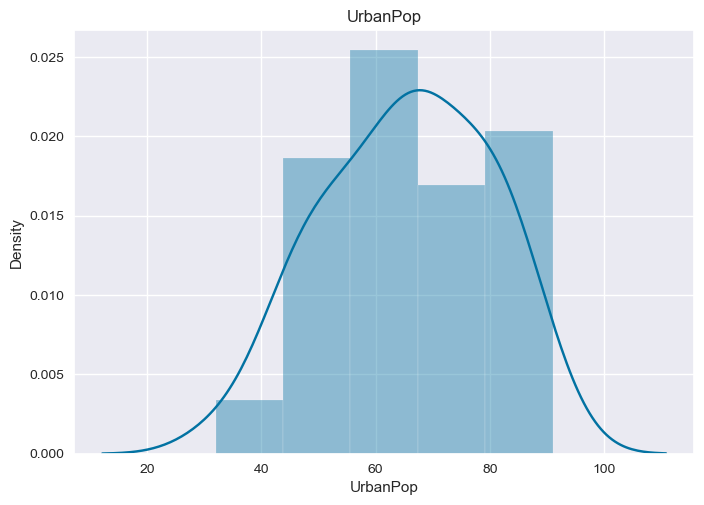

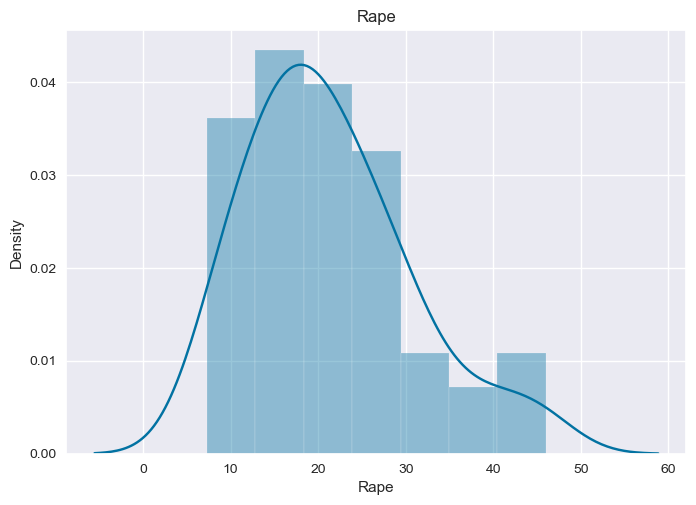

In [130]:
for feature in num_features:
    data=df.copy()
    sns.distplot(df[feature])
    plt.title(feature)
    plt.show()

In [131]:
#Outlier Detection

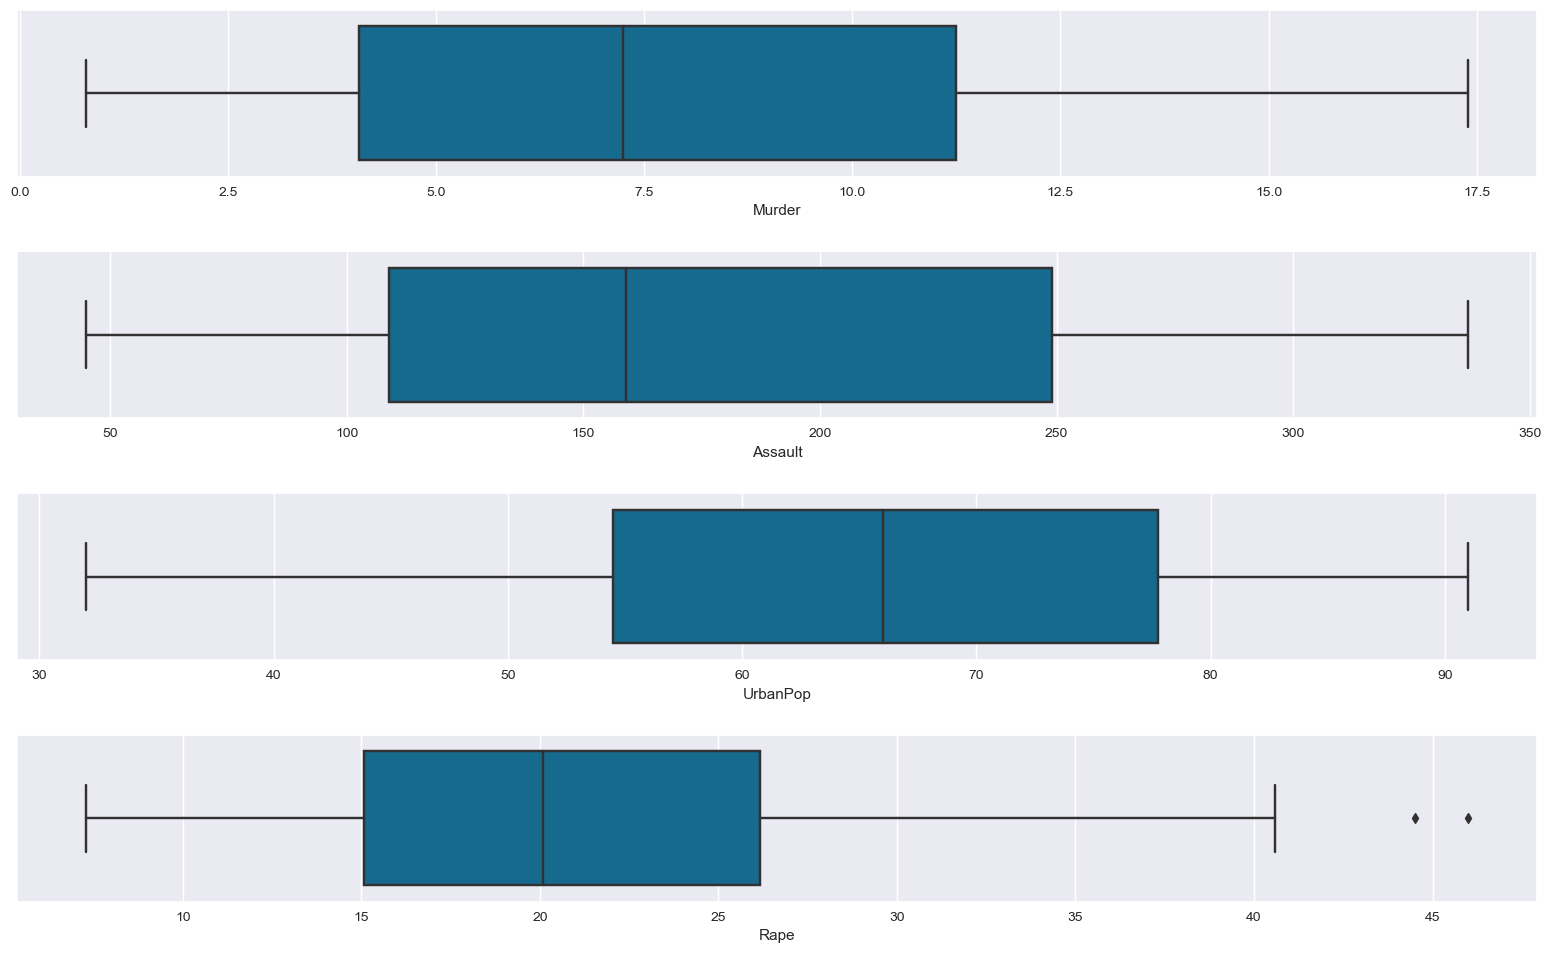

In [132]:
ot_df=df.copy()
fig, axes=plt.subplots(4,1, figsize=(16,10))
sns.boxplot(x='Murder', data=ot_df,ax=axes[0])
sns.boxplot(x='Assault', data=ot_df,ax=axes[1])
sns.boxplot(x='UrbanPop', data=ot_df,ax=axes[2])
sns.boxplot(x='Rape', data=ot_df,ax=axes[3])
plt.tight_layout(pad=2.0)
plt.show()

- Outliers are present in Rape feature

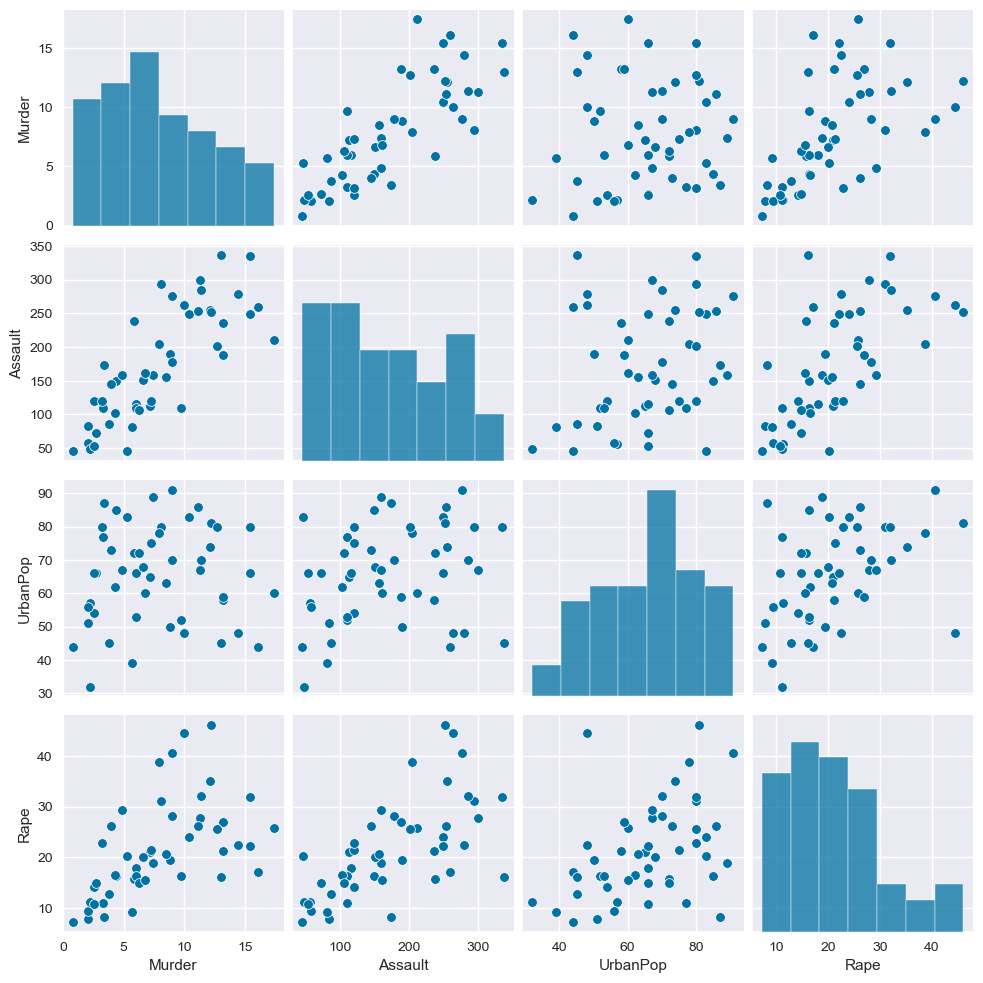

In [133]:
sns.pairplot(df)

# Feature Engineering

- Drop unwanted columns
- feature scaling

In [134]:
#Drop Unwanted column:
x=df.drop(columns=['States'])
x

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [135]:
#feature scaling
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

# 1. Hierarchical Clustering

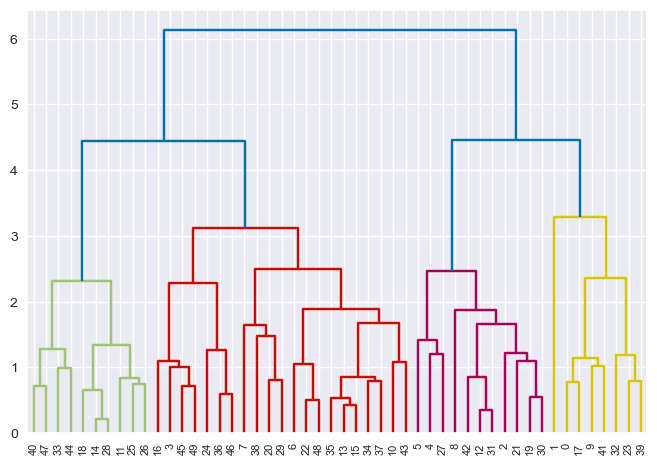

In [136]:
lk=hierarchy.linkage(x,method='complete')
dendrogram=hierarchy.dendrogram(lk)

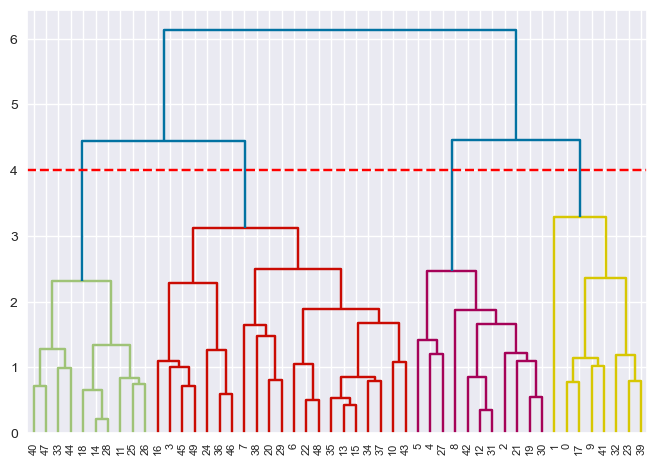

In [137]:
lk=hierarchy.linkage(x,method='complete')
dendrogram=hierarchy.dendrogram(lk)
plt.axhline(y=4,c='red', linestyle='--')

- We will build the model with 4 clusters

In [138]:
hc=AgglomerativeClustering(n_clusters=4)
y=hc.fit_predict(x)
y

array([3, 1, 1, 0, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       2, 3, 0, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0], dtype=int64)

In [20]:
df['Cluster']=y
df

,States,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [143]:
silhouette_score(x,y)

0.3370187183556962

In [21]:
df.groupby('Cluster').agg('mean')

,Murder,Assault,UrbanPop,Rape
Cluster,,,,
0,6.210526,142.052632,71.263158,19.184211
1,10.966667,264.000000,76.500000,33.608333
2,3.091667,76.000000,52.083333,11.833333
3,14.671429,251.285714,54.285714,21.685714


<AxesSubplot:xlabel='Murder', ylabel='Rape'>

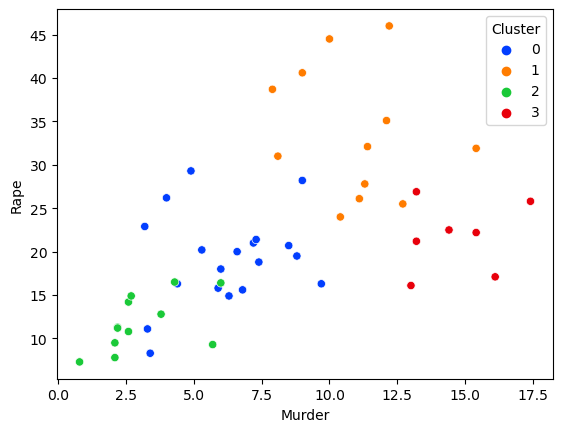

In [22]:
sns.scatterplot(df['Murder'], df['Rape'], hue=df['Cluster'], palette='bright')

<AxesSubplot:xlabel='Assault', ylabel='Rape'>

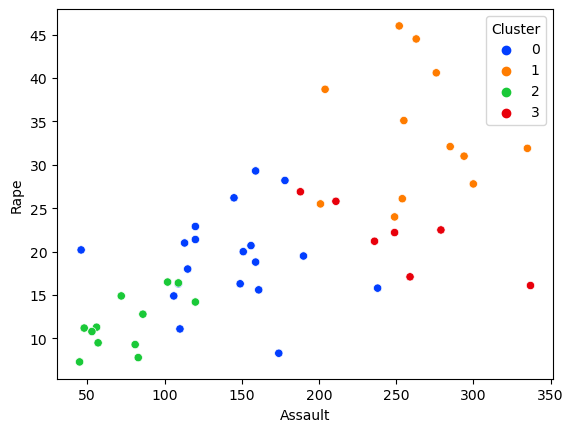

In [23]:
sns.scatterplot(df['Assault'], df['Rape'], hue=df['Cluster'], palette='bright')

<AxesSubplot:xlabel='UrbanPop', ylabel='Rape'>

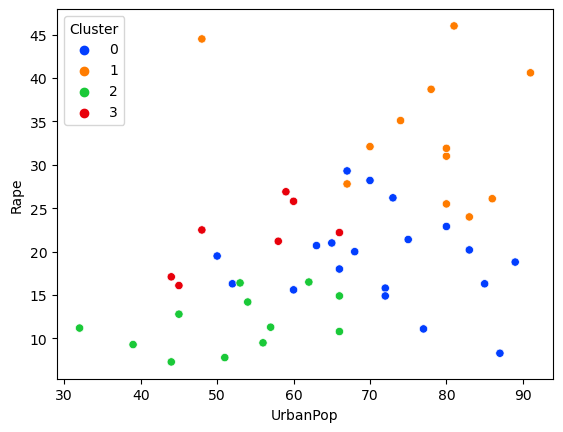

In [24]:
sns.scatterplot(df['UrbanPop'], df['Rape'], hue=df['Cluster'], palette='bright')

# 2. Kmeans

#### Before creating the model by KMeans we will find out the optimum number of cristal by Elbow Graph

In [25]:
wcss= []

for i in range(1,21):
    km=KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

In [26]:
wcss

[200.0,
 104.96163315756871,
 80.08569526137276,
 57.55425863091104,
 50.211423884532635,
 43.83865971733792,
 40.257748048343934,
 35.5604230183736,
 30.895266704266405,
 28.4220473186866,
 25.52454433833602,
 22.82618203717462,
 21.76597226701106,
 19.118395359858663,
 18.98209016893837,
 17.499766442080166,
 15.834927561332332,
 15.516610575974141,
 13.505446547374142,
 13.145168133202473]

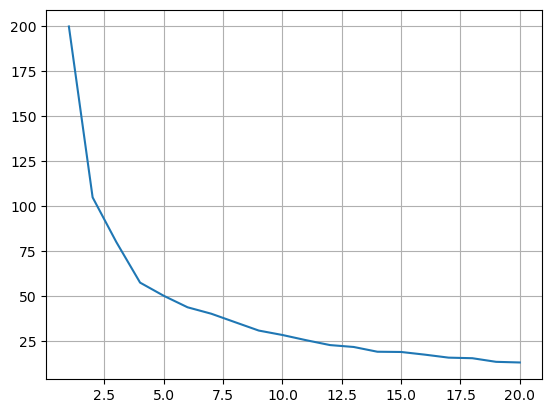

In [27]:
#Plot line graph between wcss(Variance within cluster) and number of clusters.
plt.plot(range(1,21), wcss)
plt.grid()

- Obervations: In above graph drastical decrease in variance at 4th cluster. so we will go through the 4 cluster.

In [28]:
#Create a Model with 4 cluster
model=KMeans(n_clusters=4)
y1=model.fit_predict(x)
y1

array([0, 2, 2, 0, 2, 2, 3, 3, 2, 0, 3, 1, 2, 3, 1, 3, 1, 0, 1, 2, 3, 2,
       1, 0, 2, 1, 1, 2, 1, 3, 2, 2, 0, 1, 3, 3, 3, 3, 3, 0, 1, 0, 2, 3,
       1, 3, 3, 1, 1, 3])

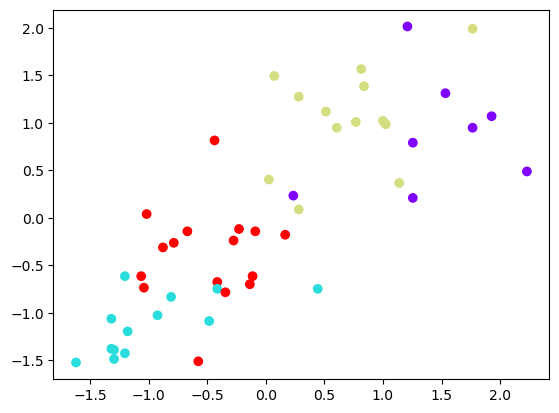

In [29]:
#Plot a Scatter Plot
plt.scatter(x[:,0], x[:,1], c=y1, cmap='rainbow')

<AxesSubplot:xlabel='Murder', ylabel='Rape'>

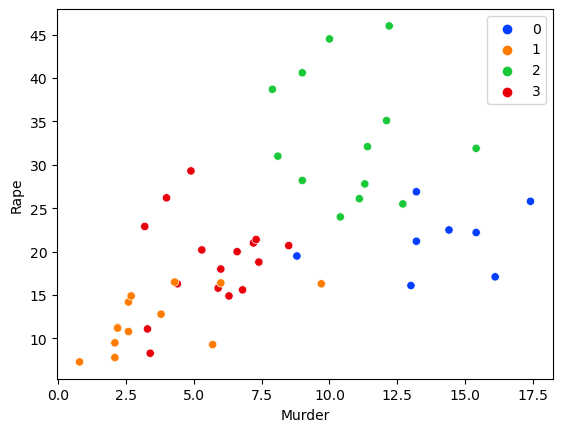

In [30]:
sns.scatterplot(df['Murder'], df['Rape'], hue=y1, palette='bright')

## Accuracy of model is check by the silhouette score. the value of silhouette scoare is within the range of -1 to 1.
- (-1) value interprite that cristal are worst.
- zero value interprite that cristals are overlapped.
- value near to 1 interprite that cristal are good.

In [140]:
from sklearn.metrics import silhouette_score

In [32]:
silhouette_score(x,y1)

0.33968891433344395

## Evaluation of Kmeans

In [33]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [34]:
from yellowbrick.cluster import SilhouetteVisualizer

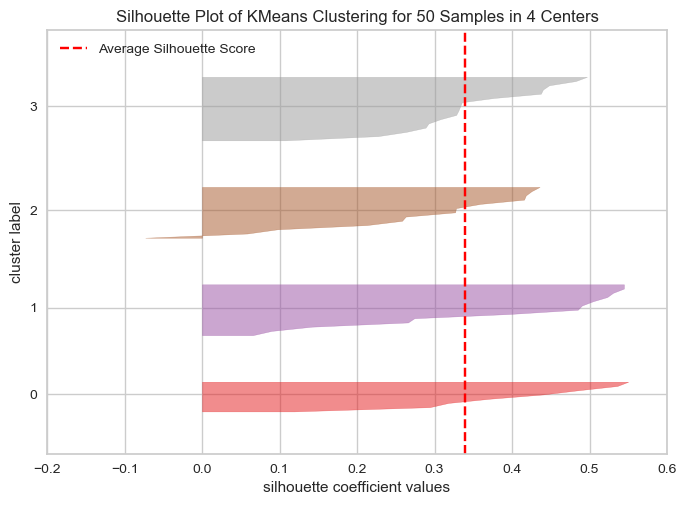

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 50 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [35]:
sv=SilhouetteVisualizer(KMeans(n_clusters=4))
vis=sv.fit(x)
vis.show()

- Each and every cluster is crossed the red dotted line, but some data points second cluster are crossing zero towards the negative side so our model is not performing good.
- so we will find out the other best silhouette score for the optimum number of cluster

In [36]:
sil_score=[]

for i in range(2,20):
    km=KMeans(n_clusters=i)
    y2=km.fit_predict(x)
    sil_score.append(silhouette_score(x,y2))

In [37]:
sil_score

[0.4084890326217641,
 0.30813622648945616,
 0.3441080718209351,
 0.30406491128195035,
 0.29910456843899946,
 0.2662187444474574,
 0.25182674835702895,
 0.2611212461962692,
 0.2554622521086898,
 0.2635965510909363,
 0.26273234505288856,
 0.2308326795163741,
 0.23793115275694582,
 0.24943054786112603,
 0.24614040356226738,
 0.22885461280361546,
 0.1922310825889254,
 0.22846601763786548]

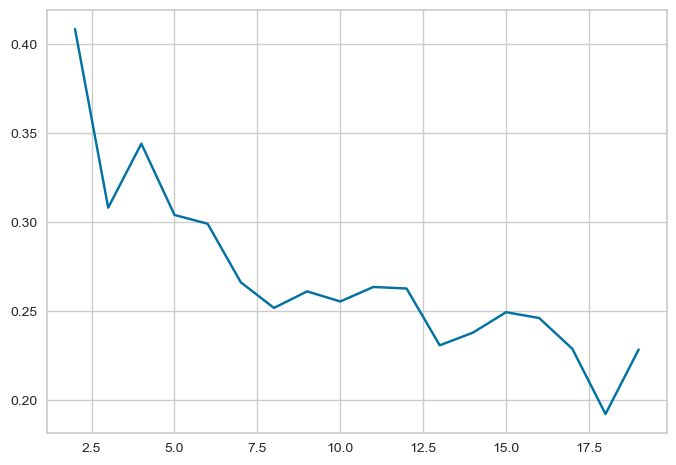

In [38]:
plt.plot(range(2,20),sil_score)

### As the silhouette score for 2 cristals are high as per interpritation of above graph so we will build the final model with two cristal.

# Final Model with KMeans Approach

In [39]:
#Create a Final Model with 2 cluster
final_model=KMeans(n_clusters=2)
y_2=final_model.fit_predict(x)
y_2

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [40]:
silhouette_score(x,y_2)

0.4084890326217641

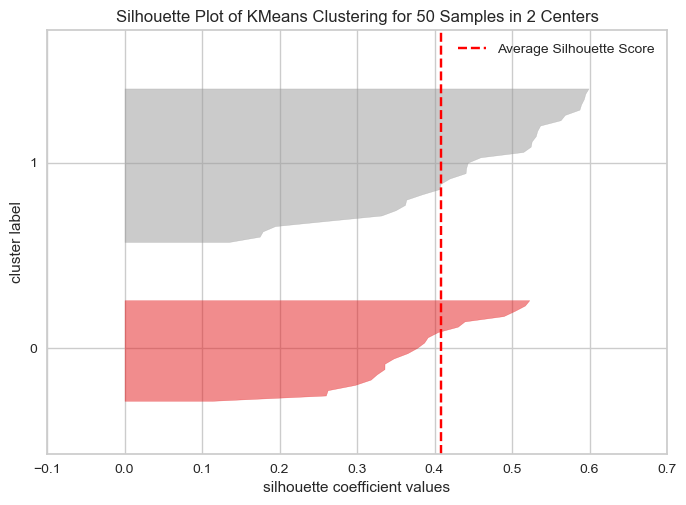

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 50 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [41]:
sv=SilhouetteVisualizer(KMeans(n_clusters=2))
vis=sv.fit(x)
vis.show()

- As obove graph interprotation, the all cristals are cross the dotted red line as well as no data points are found at the negative side. the model is performing good with two cristal.

<AxesSubplot:xlabel='Murder', ylabel='Rape'>

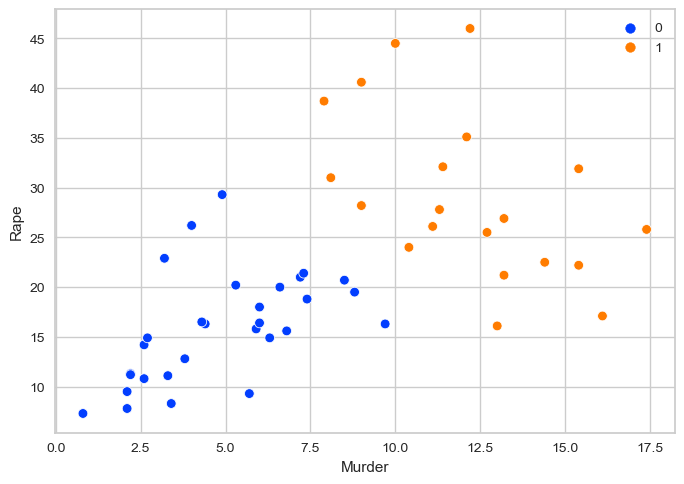

In [42]:
sns.scatterplot(df['Murder'], df['Rape'], hue=y_2, palette='bright')

In [43]:
df1=df.copy()

In [44]:
df1['Cluster']=y_2
df1

,States,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,1


# 3. DBSCAN

In [45]:
#import library for DBSCAN
from sklearn.cluster import DBSCAN

In [68]:
# First we will create a model by considering the random epsilon value.
db=DBSCAN(eps=1.2, min_samples=10)
y_3=db.fit_predict(x)
y_3

array([-1, -1, -1,  0, -1, -1,  0,  0, -1, -1,  0,  0, -1,  0,  0,  0,  0,
       -1, -1, -1,  0, -1,  0, -1,  0,  0,  0, -1,  0,  0, -1, -1, -1, -1,
        0,  0,  0,  0, -1, -1, -1, -1, -1,  0, -1,  0,  0, -1,  0,  0],
      dtype=int64)

In [69]:
#calculate the model accuracy
silhouette_score(x,y_3)

0.2309583026287726

#### As from silhouette score the accurancy is not too good. so lets do the hyperparameter tunning for best parameter selection.

## Hyperparameter Tuning

### Finding out best Epsilon Value(K Distance Plot)

In [70]:
from sklearn.neighbors import NearestNeighbors

In [71]:
neigh=NearestNeighbors(n_neighbors=10).fit(x)
dist, index=neigh.kneighbors(x)

In [72]:
dist

array([[0.        , 0.78006247, 0.84928467, 0.92509451, 1.14292205,
        1.29621831, 1.30273924, 1.30290503, 1.50105972, 1.61563499],
       [0.        , 2.07898369, 2.13697134, 2.30088403, 2.35013877,
        2.35997304, 2.36811895, 2.56180471, 2.59008583, 2.72647204],
       [0.        , 1.0482199 , 1.08341076, 1.09354181, 1.20621365,
        1.22403776, 1.32378897, 1.37888923, 1.61207525, 1.66155692],
       [0.        , 1.0013278 , 1.00722663, 1.07057017, 1.24148411,
        1.30290503, 1.436899  , 1.43992053, 1.45972128, 1.58779931],
       [0.        , 1.20897691, 1.30069114, 1.32378897, 1.53005165,
        1.6957501 , 1.81930503, 1.93115604, 2.04556279, 2.19184473],
       [0.        , 1.24886253, 1.30069114, 1.32606825, 1.37888923,
        1.41306145, 1.54876384, 1.56244725, 1.75396679, 1.80796295],
       [0.        , 0.88100359, 0.95643249, 0.99437327, 1.04597225,
        1.08653166, 1.22399673, 1.24051012, 1.29561222, 1.39838355],
       [0.        , 1.19227586, 1.2714006

In [73]:
#convert dist in a dataframe
pd.DataFrame(dist)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.780062,0.849285,0.925095,1.142922,1.296218,1.302739,1.302905,1.501060,1.615635
1,0.0,2.078984,2.136971,2.300884,2.350139,2.359973,2.368119,2.561805,2.590086,2.726472
2,0.0,1.048220,1.083411,1.093542,1.206214,1.224038,1.323789,1.378889,1.612075,1.661557
3,0.0,1.001328,1.007227,1.070570,1.241484,1.302905,1.436899,1.439921,1.459721,1.587799
4,0.0,1.208977,1.300691,1.323789,1.530052,1.695750,1.819305,1.931156,2.045563,2.191845
5,0.0,1.248863,1.300691,1.326068,1.378889,1.413061,1.548764,1.562447,1.753967,1.807963
6,0.0,0.881004,0.956432,0.994373,1.045972,1.086532,1.223997,1.240510,1.295612,1.398384
7,0.0,1.192276,1.271401,1.423126,1.452855,1.566834,1.574294,1.596922,1.599932,1.605622
8,0.0,1.309743,1.349263,1.450095,1.589068,1.767154,1.770765,1.789168,1.872619,1.969837
9,0.0,0.867978,1.022502,1.142922,1.411191,1.598929,1.775400,1.857538,1.920844,1.938027


In [74]:
#Sort a distance in assending order and we will select the 1st nearest neighbor
dist=np.sort(dist[:,1], axis=0)     #axis is 0 as we are soring the column wise or else it is 1.
dist

array([0.2079438 , 0.2079438 , 0.35377437, 0.35377437, 0.43312429,
       0.43312429, 0.49909939, 0.49909939, 0.50466926, 0.52515083,
       0.53326883, 0.54082482, 0.54082482, 0.55122406, 0.57035779,
       0.58411812, 0.59956023, 0.59956023, 0.65497312, 0.70111326,
       0.71097658, 0.71809843, 0.71809843, 0.73797792, 0.74649625,
       0.75913104, 0.78006247, 0.78006247, 0.79455301, 0.79455301,
       0.80586349, 0.80586349, 0.83250223, 0.84928467, 0.8610239 ,
       0.86797806, 0.88100359, 0.95367898, 0.98866758, 0.99246041,
       1.0013278 , 1.0482199 , 1.0582674 , 1.08184506, 1.19227586,
       1.20897691, 1.20897691, 1.24886253, 1.30974334, 2.07898369])

Text(0.5, 1.0, 'K-dist Plot')

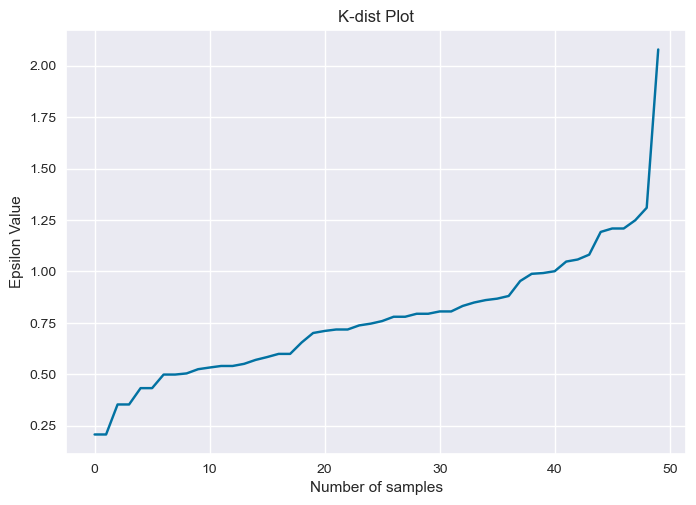

In [112]:
#plot the graph for distance
sns.set_style('darkgrid')
plt.plot(dist)
plt.xlabel('Number of samples')
plt.ylabel('Epsilon Value')
plt.title('K-dist Plot')

In [113]:
# we will check the epsilon value for 1.3
model=DBSCAN(eps=1.3, min_samples=10)
y_4=model.fit_predict(x)
y_4

array([-1, -1, -1,  0, -1, -1,  0,  0, -1, -1,  0,  0, -1,  0,  0,  0,  0,
       -1,  0, -1,  0, -1,  0, -1,  0,  0,  0, -1,  0,  0, -1, -1, -1,  0,
        0,  0,  0,  0, -1, -1,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [114]:
silhouette_score(x,y_4)

0.3785664955470221

In [119]:
#Add a cluster label in a dataset
df2['cluster_DBSCAN']=y_4
df2

,States,Murder,Assault,UrbanPop,Rape,cluster_DBSCAN
0,Alabama,13.2,236,58,21.2,-1
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,-1


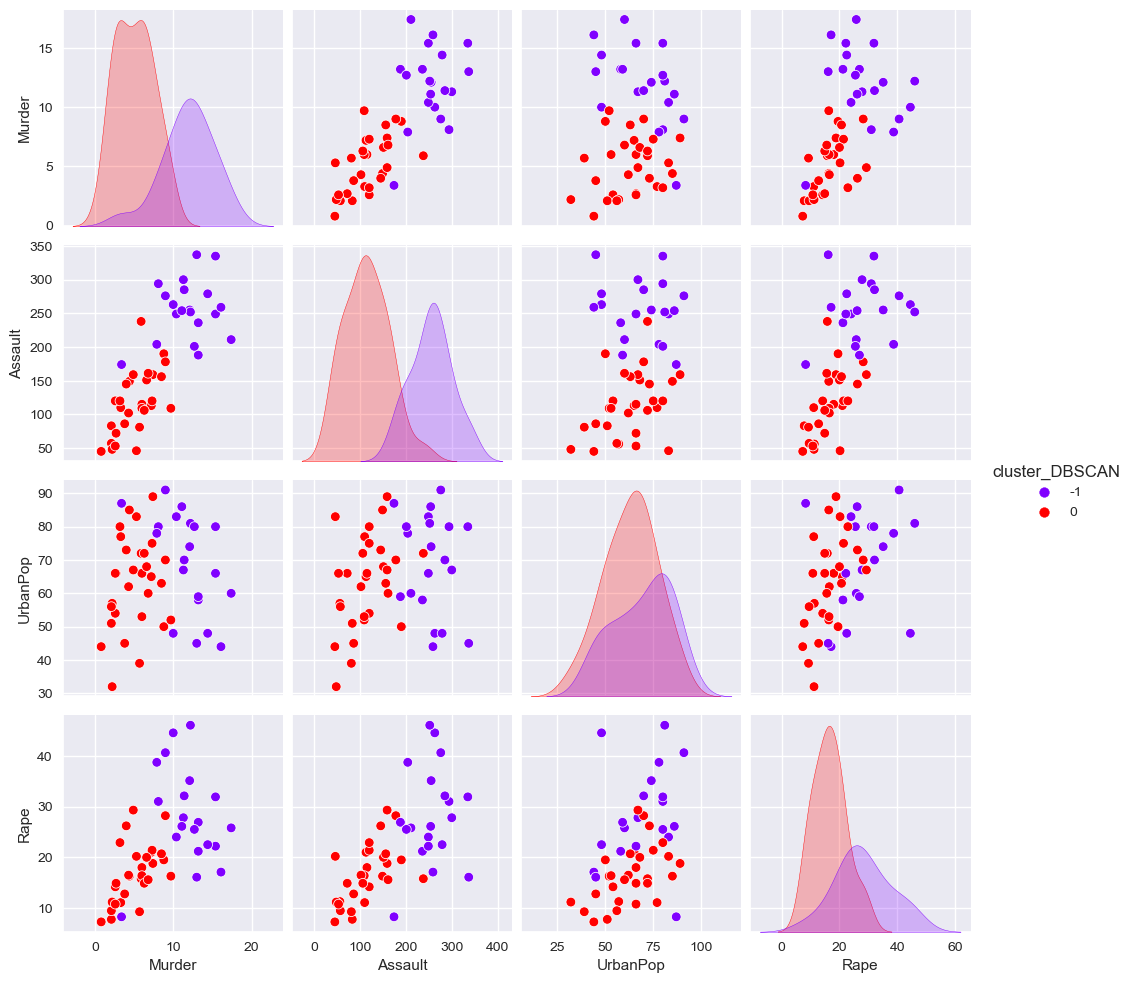

In [117]:
#plot a scatterplot foe all features with the hepl of pairplot
sns.pairplot(df2,hue='cluster_DBSCAN',palette='rainbow')

<AxesSubplot:xlabel='Murder', ylabel='Rape'>

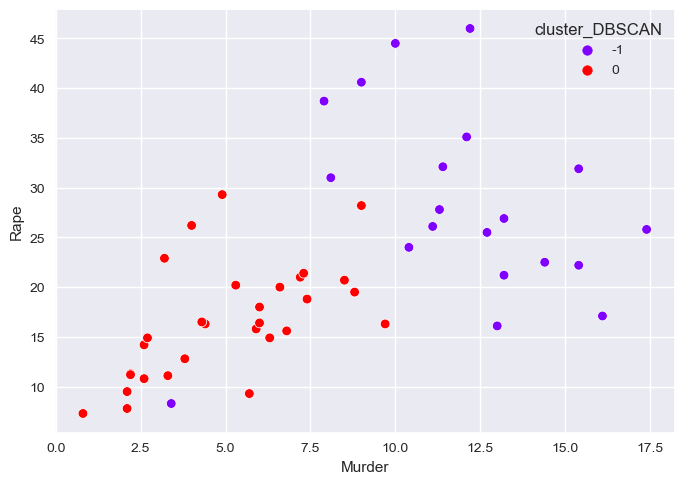

In [118]:
sns.scatterplot(df2['Murder'], df2['Rape'], hue=df2['cluster_DBSCAN'], palette='rainbow')

# Inferences

## Hierarchical Clustering
- In a hierarchical clustering we form the 4 clusters by cutting the dendrograme.
- In a hierarchical clustering silhouette_score is 0.337.
- we cannot detect the outliers.

## KMeans Clustering¶
- In a KMeans clustering we form the 2 clusters by doing the hyperparameter tuning to get the optimum number of cluster as well as best silhouette score.
- In a KMeans clustering silhouette_score is 0.408.
- we cannot detect the outliers.

## DBSCAN Clustering¶
- In a DBSCAN clustering we form the single clusters by doing the hyperparameter tuning to get the appropriate value of epsilon.
- In a DBSCAN clustering silhouette_score is 0.378.
- we have detected the outlier here.